<center><h1>  1. zadaća </h1></center>
<center><h1> Pomoćna bilježnica, generiranje testnih podataka i primjera </h1></center>

In [32]:
import numpy as np
import pandas as pd
import random as rand
import functools as func
import time
import matplotlib.animation
import matplotlib.pyplot as plt
import os

$$\parbox[3.5pt][3.5pt][3.5pt]{4pt}{SIR}$$

$ \framebox[5em][2em]{I} $

<h6> Primjer 1. </h6>
Konstrukcija konveksnog i nekonveksnog peterokuta

%matplotlib
Convex = [[1,1], [2,1], [3,3], [1.5,4], [0, 3]]
Convex.append(Convex[0]) 
x, y = zip(*Convex) 

notConvex = [[1,1], [2,1], [3,3], [1.5,2], [0, 3]]
notConvex.append(notConvex[0]) 
x_, y_ = zip(*notConvex)


plot_difference, (left, right ) = plt.subplots(1, 2, figsize=(5,3), sharey=True)
left.plot( x, y, color='brown')
left.set_title("Konveksni poligon ")
right.plot( x_, y_, color='brown')
right.set_title("Nekonveksni poligon ")

#plot_difference

<h6> Primjer 2. </h6>
Primjer skupa i njegove konveksne ljuske

Set = [[1,1], [2,1], [3,3], [1.5,2], [0, 3]]
ConvexHull = [[1,1], [2,1], [3,3], [0, 3]]
ConvexHull.append(ConvexHull[0])
x1, y1 = zip(*ConvexHull)
x2, y2 = zip(*Set)  

Hull_of_Set, (left_, right_ ) = plt.subplots(1, 2, figsize=(5, 3), sharey=True)
left_.scatter( x2, y2, color='brown', s=4) 
left_.set_title(" Skup točaka ")
right_.plot( x1, y1, color='brown')
right_.set_title(" Konveksna ljuska ")

#Hull_of_Set.savefig('test_data/primjer2.png')

<h6> Pomoćne funkcije </h6>
- Lijeva orijentacija
- Udaljenost
- Početna točka
- Funkcija za sortiranje

In [33]:
def left_turn( point_A, point_B, point_C):
    return (( point_A[0] * (point_B[1] - point_C[1])) 
            + point_B[0] * (point_C[1] - point_A[1]) 
            + point_C[0] * (point_A[1] - point_B[1]));

def distance( point_A, point_B):
    return (  ( point_A[0] - point_B[0])**2 
            + ( point_A[1] - point_B[1])**2);

def lowest_point( array_points ):
    minY = array_points[0]
    for point in array_points:
        if (   ( point[1] < minY[1] ) 
            or ( point[1] == minY[1] and point[0] < minY[0] ) ):
            minY = point
    return minY

def leftmost_point( array_points ):
    minX = array_points[0]
    for point in array_points:
        if (   ( point[0] < minX[0] ) 
            or ( point[0] == minX[0] and point[1] < minX[1] ) ):
            minX = point
    return minX

def function_for_sort( x, y ):  
    global P_0
    coef = left_turn(P_0, x, y)
    if coef > 0 :
        return -1
    elif coef == 0:
        if distance(P_0, x) < distance(P_0, y):
            return -1
    return 1

In [34]:
# Primjer 3
# Primjer 4

<h6> Grahamov algoritam </h6>

In [35]:
def Graham( array_of_points ):
    new_array = list(array_of_points)
    global P_0 
    P_0 = leftmost_point( new_array )
    new_array.remove( P_0 )
    new_array = sorted( new_array, 
                       key=func.cmp_to_key(function_for_sort))
    Convex_hull = []
    Convex_hull.append(new_array[-1])
    Convex_hull.append( P_0 )
    index = 0
    size = len(new_array)
    while( index != size ):
        examination_point = new_array[index]
        try:
            Convex_hull[-2]
        except:
            index += 1
            continue
        if ( left_turn( Convex_hull[-2], Convex_hull[-1], examination_point ) > 0 ):
            Convex_hull.append( examination_point )
            index += 1
        else:
            Convex_hull.pop()
    return Convex_hull

<h6> Primjer 5. </h6>
Konstruiranje malog skupa točkama $\in [0,100]x[0,100]$  i njegove konveksne ljuske određene Grahamovim algoritmom.

import json
Example_set = [[1,1], [0,1], [3,3], [1.5,2], [0, 3], [1,2] ,[4,4] ]
Convex = Graham( Example_set )

with open('test_data/primjer5.1', 'w')as outfile:
    json.dump(Example_set, outfile)

with open('test_data/primjer5.2', 'w')as outfile:
    json.dump(Convex, outfile)

<h6> Primjer 6. </h6>
Konstrukcija skupa od 100 točaka. Određivanje njegove konveksne ljuske. Grafički prikaz.

array_ = []
for x in range(200):
    point = [ rand.randint(1,100), rand.randint(1,100) ]
    array_.append(point)

ConvexHull_array = Graham( array_ )
P_0 = leftmost_point( array_ )

ConvexHull_array.append(ConvexHull_array[0])
x1, y1 = zip(*array_)
x2, y2 = zip(*ConvexHull_array) 
 
Hull = plt.figure(figsize=(9,7))
ax1 = Hull.add_subplot(111)
ax1.scatter( x1, y1, color='brown', s=3)
ax1.plot( x2, y2, color='brown')

#Hull.savefig('test_data/primjer6.png')

<h6> Grahamov algoritam - animacija </h6>

In [36]:
def Graham_construct_animation( array_of_points ):
    animate_Convex_hull =[]
    new_array = list(array_of_points)
    global P_0 
    P_0 = leftmost_point( new_array )
    new_array.remove( P_0 )
    new_array = sorted( new_array, key=func.cmp_to_key(function_for_sort))
    Convex_hull = []
    Convex_hull.append(new_array[-1])
    Convex_hull.append( P_0 )
    index = 0
    temp = 0
    size = len(new_array)
    while( index != size ):
        temp = temp + 1
        examination_point = new_array[index]
        Convex_hull.append( examination_point)
        animate_Convex_hull.append(Convex_hull[1:-1])
        Convex_hull.remove( examination_point)
        try:
            Convex_hull[-2]
        except:
            index += 1
            continue
        if ( left_turn( Convex_hull[-2], Convex_hull[-1], examination_point ) > 0 ):
            Convex_hull.append( examination_point )
            index += 1
        else:
            Convex_hull.pop()
            
    Convex_hull.append(Convex_hull[0])
    animate_Convex_hull.append(Convex_hull)
    return animate_Convex_hull


<h6> Primjer 7. </h6>
Ostavljen je kod u glavnoj biljeznici

Example_array = []
for x in range(50):
    point = [ rand.randint(1,100), rand.randint(1,100) ]
    Example_array.append(point)

Scatter_pointsX, Scatter_pointsY =  zip(*Example_array)
ConvexHull_animation =  Graham_construct_animation( Example_array ) 

fig, ax = plt.subplots()
ax.axis([0,100, 0, 100])
ax.scatter(Scatter_pointsX, Scatter_pointsY, s = 2, color = 'black' )
l, = ax.plot([],[])

def animate(i, Convex_data, ax):
    top = len(Convex_data)
    if i >= 1 and  i<= top:
        processing_data = Convex_data[i] 
        x_axes, y_axes = zip(*processing_data)
        l.set_data(x_axes[:i], y_axes[:i])
    
%matplotlib inline

#ani = matplotlib.animation.FuncAnimation(fig, animate, len(ConvexHull_animation),fargs=( ConvexHull_animation, ax))

#from IPython.display import HTML
#HTML(ani.to_jshtml())

<h6> Jarvis </h6>

In [37]:
def Jarvis( array_of_points ):
    new_array = list(array_of_points) 
    P_0 = lowest_point( new_array )
    P_min = P_0
    Convex_hull = []
    P_next = P_0
    start = 1
    while( start or P_next != P_0):
        start = 0
        for examination_point in new_array:
            coef = left_turn( P_min, P_next, examination_point) 
            if coef < 0:
                P_next = examination_point
            elif coef == 0:
                if distance( P_min, P_next) < distance(P_min, examination_point) and examination_point != P_next:
                    P_next = examination_point
        P_min = P_next
        Convex_hull.append(P_next)
    return Convex_hull

<h6> Primjer 8. </h6>
Skup od 200 točaka, obrađen Jarvis algoritmom.

%matplotlib inline

array_ = []
for x in range(200):
    point = [ rand.randint(1,100), rand.randint(1,100) ]
    array_.append(point)

ConvexHull_array = Jarvis( array_ )
P_0 = leftmost_point( array_ )

ConvexHull_array.append(ConvexHull_array[0])
x1, y1 = zip(*array_)
x2, y2 = zip(*ConvexHull_array) 

Hull = plt.figure(figsize=(9,7))
ax1 = Hull.add_subplot(111)
ax1.scatter( x1, y1, color='blue', s=4)
ax1.plot( x2, y2, color='brown')

#Hull.savefig('test_data/primjer9.png')

In [38]:
#generiranje random skupa
def random_skup( broj_točaka ):
    array_ = []
    for x in range(broj_točaka):
#        point = [ np.random.randint(1,100), np.random.randint(1,100) ]
        point = [ rand.randint(0,100), rand.randint(0,100),]
        array_.append(point)
    return array_

In [39]:
# pokus: Graham - kvadrat
# Izrada pokusa - povezanost broja točaka konveksne ljuske

def Pokus(broj_pokusa, broj_točaka):
    Num_Convex = []
    Convex = []    
    for i in range( len(broj_točaka) ):
        for j in range (broj_pokusa):
            Points = random_skup( broj_točaka[i] )
            Convex = Graham(Points)
            Num_Convex.append([broj_točaka[i], len(Convex)])
    return Num_Convex

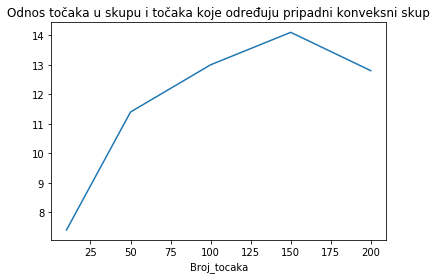

In [40]:
# Pokus 1: 10 testiranja za skupove jednake velicine

broj_pokusa = 10
broj_točaka = [10, 50, 100, 150, 200]

Num_Convex = Pokus(broj_pokusa, broj_točaka)
data =  pd.DataFrame.from_records(Num_Convex, columns=[ 'Broj_tocaka', 'Broj_tocaka_Conv'])
Analiza = data.groupby('Broj_tocaka')['Broj_tocaka_Conv'].sum()/broj_pokusa
Analiza.plot( x = 'Broj točaka u skupu', y = 'Broj točaka koje određuju konveksnu ljusku', title = 'Odnos točaka u skupu i točaka koje određuju pripadni konveksni skup')

In [41]:
# Pokus 2: 20 testiranja za skupove jednake velicine


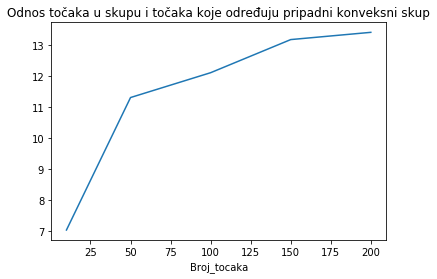

In [42]:
# Pokus 3: 30 testiranja za skupove jednake velicine

broj_pokusa = 30
broj_točaka = [10, 50, 100, 150, 200]

Num_Convex_3 = Pokus(broj_pokusa, broj_točaka)

data_3 =  pd.DataFrame.from_records(Num_Convex_3, columns=[ 'Broj_tocaka', 'Broj_tocaka_Conv'])
Analiza_3 = data_3.groupby('Broj_tocaka')['Broj_tocaka_Conv'].sum()/broj_pokusa
Analiza_3.plot( x = 'Broj točaka u skupu', y = 'Broj točaka koje određuju konveksnu ljusku', title = 'Odnos točaka u skupu i točaka koje određuju pripadni konveksni skup')

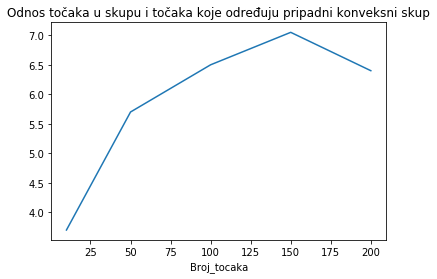

In [43]:
# Pokus 4: 20 testiranja za skupove jednake velicine, dodan skup od 300 točaka

broj_pokusa = 20
broj_točaka = [10, 50, 100, 150, 200, 250, 300]

Num_Convex_2 = Pokus(broj_pokusa, broj_točaka)

data_2 =  pd.DataFrame.from_records(Num_Convex_2, columns=[ 'Broj_tocaka', 'Broj_tocaka_Conv'])
Analiza_2 = data.groupby('Broj_tocaka')['Broj_tocaka_Conv'].sum()/broj_pokusa
Analiza_2.plot( x = 'Broj točaka u skupu', y = 'Broj točaka koje određuju konveksnu ljusku', title = 'Odnos točaka u skupu i točaka koje određuju pripadni konveksni skup')

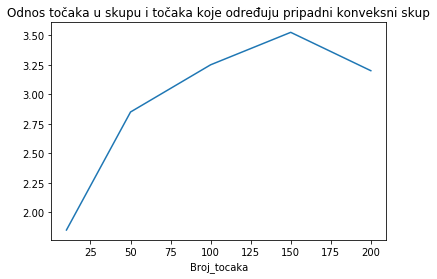

In [45]:
# Pokus 4: 40 testiranja za skupove jednake velicinea

broj_pokusa = 40
broj_točaka = [10, 50, 100, 150, 200, 250]

Num_Convex_4 = Pokus(broj_pokusa, broj_točaka)

data_4 =  pd.DataFrame.from_records(Num_Convex_4, columns=[ 'Broj_tocaka', 'Broj_tocaka_Conv'])
Analiza_4 = data.groupby('Broj_tocaka')['Broj_tocaka_Conv'].sum()/broj_pokusa
Analiza_4.plot( x = 'Broj točaka u skupu', y = 'Broj točaka koje određuju konveksnu ljusku', title = 'Odnos točaka u skupu i točaka koje određuju pripadni konveksni skup')

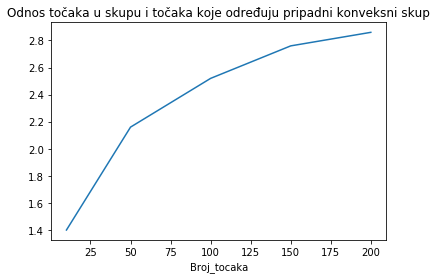

In [105]:

broj_pokusa = 50
broj_točaka = [10, 50, 100, 150, 200, 250]

Num_Convex_4 = Pokus(broj_pokusa, broj_točaka)

data_4 =  pd.DataFrame.from_records(Num_Convex_4, columns=[ 'Broj_tocaka', 'Broj_tocaka_Conv'])
Analiza_4 = data.groupby('Broj_tocaka')['Broj_tocaka_Conv'].sum()/broj_pokusa
Analiza_4.plot( x = 'Broj točaka u skupu', y = 'Broj točaka koje određuju konveksnu ljusku', title = 'Odnos točaka u skupu i točaka koje određuju pripadni konveksni skup')

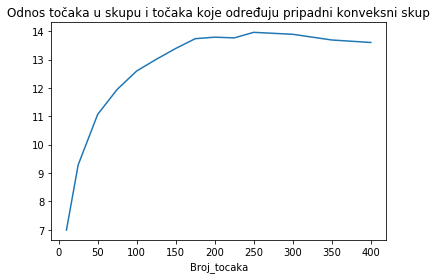

In [47]:
# Prvi pravi pokus

broj_pokusa = 1000
broj_točaka = [10,25, 50,75, 100, 125, 150,175, 200,225,250,300,350, 400]

Num_Convex_4 = Pokus(broj_pokusa, broj_točaka)

data_4 =  pd.DataFrame.from_records(Num_Convex_4, columns=[ 'Broj_tocaka', 'Broj_tocaka_Conv'])
Analiza_4 = data_4.groupby('Broj_tocaka')['Broj_tocaka_Conv'].sum()/broj_pokusa
Analiza_4.plot( x = 'Broj točaka u skupu', y = 'Broj točaka koje određuju konveksnu ljusku', title = 'Odnos točaka u skupu i točaka koje određuju pripadni konveksni skup')

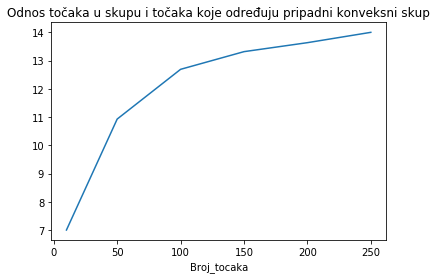

In [124]:
# Drugi pravi pokus

broj_pokusa = 500
broj_točaka = [10, 50, 100, 150, 200, 250]

Num_Convex_4 = Pokus(broj_pokusa, broj_točaka)

data_4 =  pd.DataFrame.from_records(Num_Convex_4, columns=[ 'Broj_tocaka', 'Broj_tocaka_Conv'])
Analiza_4 = data_4.groupby('Broj_tocaka')['Broj_tocaka_Conv'].mean()
Analiza_4.plot( x = 'Broj točaka u skupu', y = 'Broj točaka koje određuju konveksnu ljusku', title = 'Odnos točaka u skupu i točaka koje određuju pripadni konveksni skup')

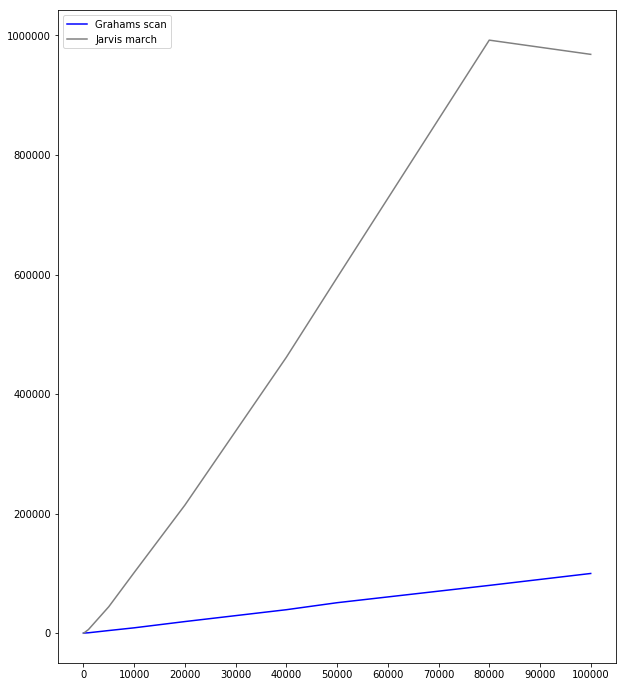

In [61]:
Graham_x = [10, 100, 1000, 5000, 10000, 20000, 40000, 50000, 80000, 100000]
Graham_y = [ 0, 156, 624, 4374, 8906, 19375, 39218, 50938, 79891, 99845]

Jarvis_x = [10, 100, 1000, 5000, 10000, 20000, 40000, 50000, 80000, 100000]           
Jarvis_y = [15, 250, 6033, 44160, 101293, 214140, 461505, 594736, 992177, 968382]

for i in Graham_y:
    i = 1/10
for i in Jarvis_y:
    i = 1/10

#Hull = plt.figure(figsize=(9,7)) 
#ax1 = Hull.add_subplot(111) ax1.scatter( x1, y1, color='blue', s=4) ax1.plot( x2, y2, color='brown')

Time_GrvsJa = plt.figure(figsize=(10, 12))
ax1 = Time_GrvsJa.add_subplot(111)
plt.xticks(np.arange (0, 1000000, 10000))
ax1.plot(Graham_x, Graham_y, color = 'blue', label='Grahams scan')
ax1.plot(Jarvis_x, Jarvis_y, color = 'grey', label='Jarvis march')
ax1.legend()

